In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
df = pd.read_csv("../input/ucinewsaggregatorcsv/uci-news-aggregator.csv") # Importing dataset

In [3]:
df.head() #Checking top 5 records

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [4]:
df.shape #Checking data shape

(422419, 8)

In [5]:
df.info() #Check Information of Columns of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         422419 non-null  int64  
 1   TITLE      422419 non-null  object 
 2   URL        422419 non-null  object 
 3   PUBLISHER  422417 non-null  object 
 4   CATEGORY   422419 non-null  object 
 5   STORY      422419 non-null  object 
 6   HOSTNAME   422419 non-null  object 
 7   TIMESTAMP  422419 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [6]:
df1 = df

In [7]:
df1.columns #checking columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [8]:
df1.isna().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [9]:
# To drop null values
df1.dropna(axis=0,inplace=True)

In [10]:
df1.shape

(422417, 8)

In [11]:
df1.isna().sum() #Checking Null Values

ID           0
TITLE        0
URL          0
PUBLISHER    0
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [12]:
# Finding unique values in all features
for i in df1.columns:
    print("{}:{}".format(i,df1[i].unique()))

ID:[     1      2      3 ... 422935 422936 422937]
TITLE:['Fed official says weak data caused by weather, should not slow taper'
 "Fed's Charles Plosser sees high bar for change in pace of tapering"
 'US open: Stocks fall after Fed official hints at accelerated tapering'
 ...
 'Child who swallowed battery to have reconstructive surgery at Cincinnati  ...'
 'Phoenix boy undergoes surgery to repair throat damage - WFSB 3 Connecticut'
 'Phoenix boy undergoes surgery to repair throat damage - CBS 3 Springfield  ...']
URL:['http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\\?track=rss'
 'http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html'
 'http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436'
 ...
 'http://www.newsnet5.com/news/local-news/child-who-swallowed-battery-to-have-reconstructive-surgery-at-cinci

In [13]:
df2 = df1
df2.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [14]:
#Converting upper case into lower case to categories name
df2.columns = df2.columns.str.lower()

In [15]:
# Converting selected feature values into lower case
for i in df2[['title','publisher','hostname']]:
    df2[i]=df2[i].apply(lambda x: x.lower())

In [16]:
df2['timestamp'].head()

0    1.394470e+12
1    1.394470e+12
2    1.394470e+12
3    1.394470e+12
4    1.394470e+12
Name: timestamp, dtype: float64

In [17]:
# Convert timestamps values into datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')

In [18]:
df2['category'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [19]:
# Replacing categories values into a suitable name
name = {'b':'Business',
       't':'Technology',
       'e':'Entertainment',
       'm':'Health'}
df2.replace({'category':name},inplace=True)

In [20]:
# Creating new feature associated with Category feature
df2['categoryid'] = df2['category'].factorize()[0]

# Exploratory Data Analysis (EDA)

### Visualization of Category Feature

In [21]:
df2['category'].value_counts()

Entertainment    152469
Business         115966
Technology       108343
Health            45639
Name: category, dtype: int64

Text(0, 0.5, 'Fequency')

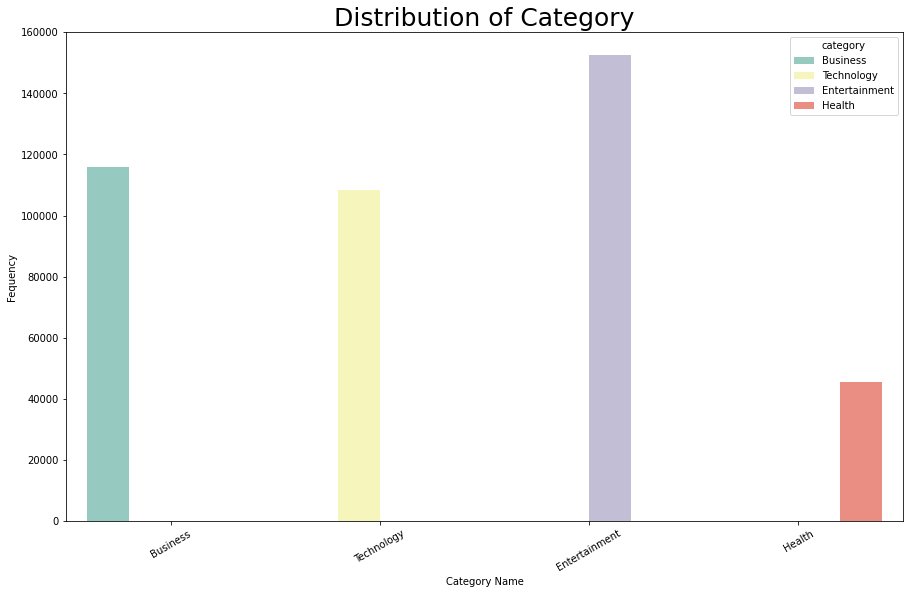

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(data=df2,x='category',hue ='category',palette="Set3")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Distribution of Category',fontsize=25)
plt.xlabel('Category Name')
plt.ylabel('Fequency')

Text(0.5, 1.0, 'Percentage of Category')

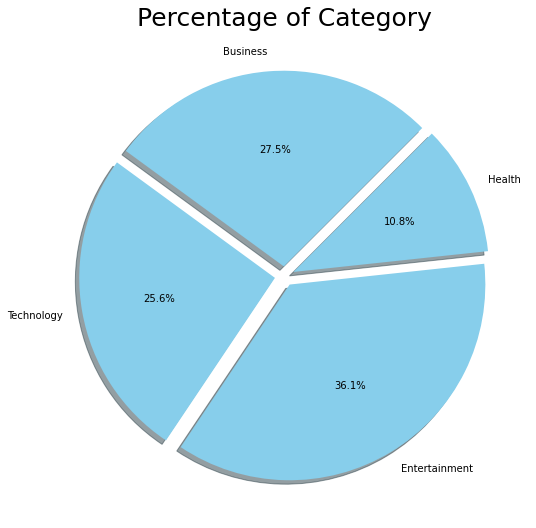

In [23]:
fig = plt.figure(figsize = (15,9))
colors = ["skyblue"]
Business = df2[df2['categoryid'] == 0]
Technology = df2[df2['categoryid'] == 1]
Entertainment = df2[df2['categoryid'] == 2]
Health = df2[df2['categoryid'] == 3]
count = [Business['categoryid'].count(), Technology['categoryid'].count(), 
         Entertainment['categoryid'].count(),Health['categoryid'].count()]
pie = plt.pie(count, labels = ['Business', 'Technology', 'Entertainment','Health'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05,0.05))
plt.title("Percentage of Category",fontsize=25)

###  Step to perform: Cleaning the values of title feature

In [24]:
# Defining function to clean the text
def clean(text):
    text =re.sub('[^A-Za-z]+', ' ', str(text)) # Removes all special characters and numericals leaving the alphabets
    return text
# Now, cleaning the text in the title column
df2['title'] = df2['title'].apply(clean)

In [25]:
df2.title.head(15)

0     fed official says weak data caused by weather ...
1     fed s charles plosser sees high bar for change...
2     us open stocks fall after fed official hints a...
3     fed risks falling behind the curve charles plo...
4     fed s plosser nasty weather has curbed job growth
5      plosser fed may have to accelerate tapering pace
6              fed s plosser taper pace may be too slow
7     fed s plosser expects us unemployment to fall ...
8     us jobs growth last month hit by weather fed p...
9     ecb unlikely to end sterilisation of smp purch...
10    ecb unlikely to end sterilization of smp purch...
11                eu s half baked bank union could work
12         europe reaches crunch point on banking union
13    ecb focus stronger euro drowns out ecb s messa...
14           eu aims for deal on tackling failing banks
Name: title, dtype: object

### To visulize the words

(-0.5, 11999.5, 5999.5, -0.5)

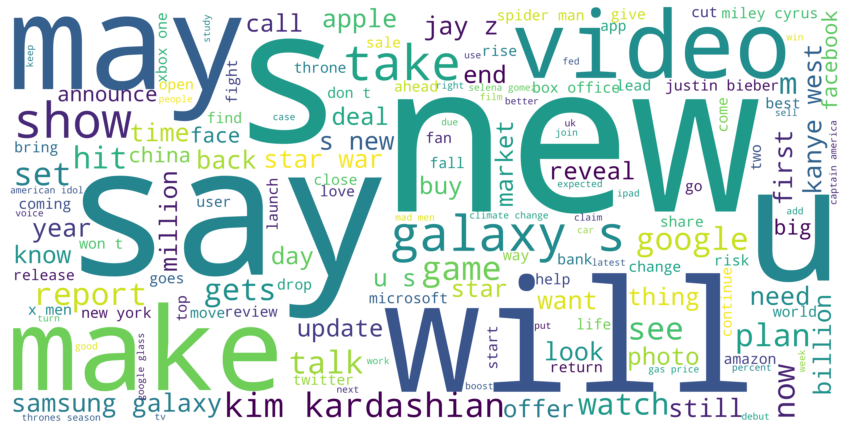

In [26]:
from wordcloud import WordCloud
word_cloud_text = "".join(df2['title'])

wordcloud_reviews = WordCloud(max_font_size=200, # Maximum font size for the largest word
                             max_words=150, # Maximum words
                             background_color='white', #Background color for the word cloud image
                             scale=15, #Scaling between computation and drawing
                             width=800, #width of the canvas
                             height=400, #Height of the canvas
                             mode='RGB',
                             #relative_scaling='auto'
                             ).generate(word_cloud_text)

plt.figure(figsize=(15,9))
plt.imshow(wordcloud_reviews,interpolation="bilinear") #To make the image appear more smoothly
plt.axis('off')

In [27]:
df2.groupby('category').categoryid.value_counts()

category       categoryid
Business       0             115966
Entertainment  2             152469
Health         3              45639
Technology     1             108343
Name: categoryid, dtype: int64

In [28]:
business = df2[df2['categoryid']==0]
business = business['title']

In [29]:
technology = df2[df2['categoryid']==1]
technology = technology['title']

In [30]:
entertainment = df2[df2['categoryid']==2]
entertainment = entertainment['title']

In [31]:
health = df2[df2['categoryid']==3]
health = health['title']

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Visualizing categorywise word cloud  

In [33]:
stop = stopwords.words('english')
stop.extend(['u','s','a','p','m','n','y','us'])
def wordcloud_draw(dataset,color='white'):
    word_cloud_text = "".join(dataset)
    wordclouds = WordCloud(stopwords=stop,
                             max_font_size=200, # Maximum font size for the largest word
                             max_words=150, # Maximum words
                             background_color='white', #Background color for the word cloud image
                             scale=15, #Scaling between computation and drawing
                             width=800, #width of the canvas
                             height=400, #Height of the canvas
                             mode='RGB',
                             #relative_scaling='auto'
                             ).generate(word_cloud_text)
    plt.figure(figsize=(15,9))
    plt.imshow(wordclouds,interpolation="bilinear") #To make the image appear more smoothly
    plt.axis('off')

Business Related Words


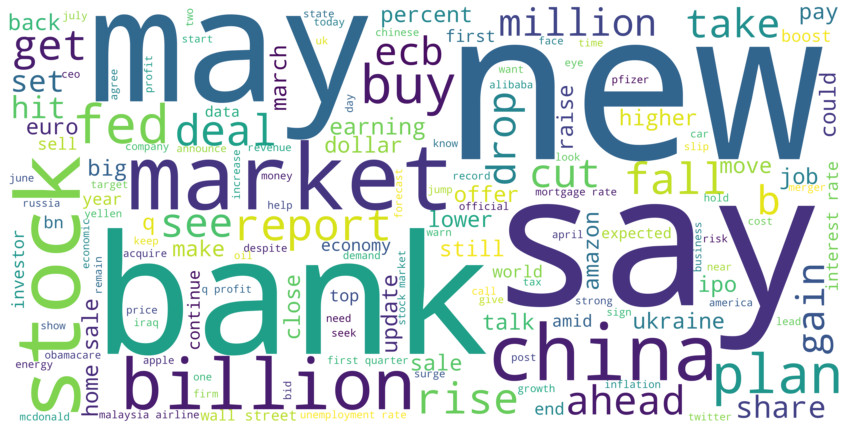

In [34]:
print('Business Related Words')
wordcloud_draw(business,'white')

Technology Related Words


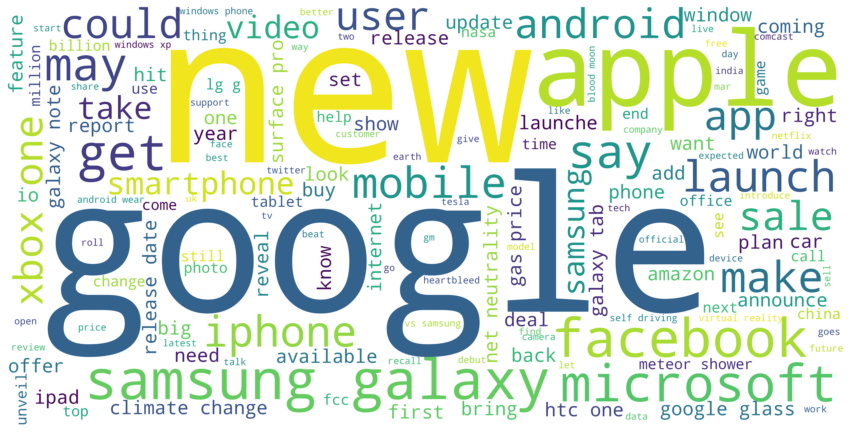

In [35]:
print('Technology Related Words')
wordcloud_draw(technology,'white')

Entertainment Related Words


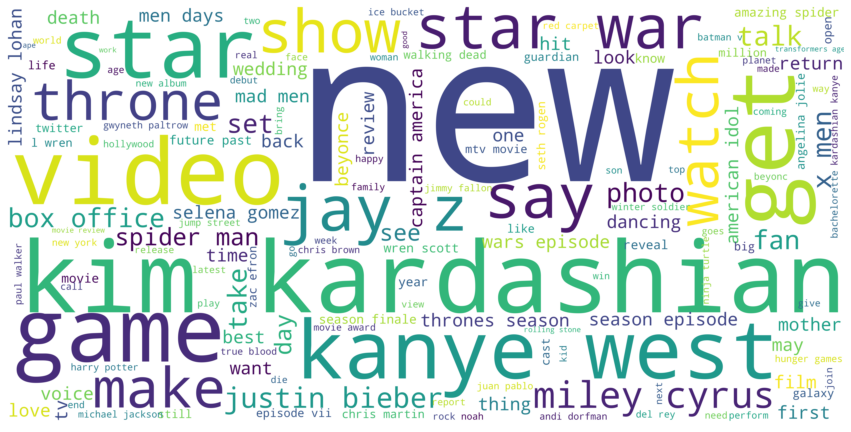

In [36]:
print('Entertainment Related Words')
wordcloud_draw(entertainment,'white')

Health Related Words


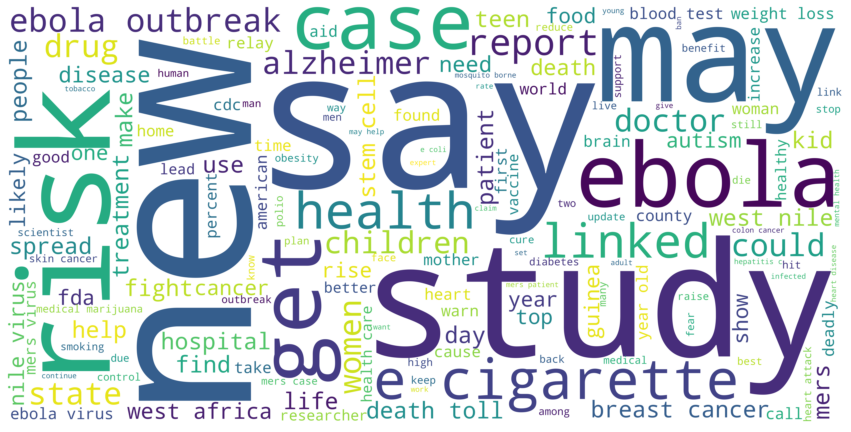

In [37]:
print('Health Related Words')
wordcloud_draw(health,'white')

In [38]:
df2['title'].head(20)

0     fed official says weak data caused by weather ...
1     fed s charles plosser sees high bar for change...
2     us open stocks fall after fed official hints a...
3     fed risks falling behind the curve charles plo...
4     fed s plosser nasty weather has curbed job growth
5      plosser fed may have to accelerate tapering pace
6              fed s plosser taper pace may be too slow
7     fed s plosser expects us unemployment to fall ...
8     us jobs growth last month hit by weather fed p...
9     ecb unlikely to end sterilisation of smp purch...
10    ecb unlikely to end sterilization of smp purch...
11                eu s half baked bank union could work
12         europe reaches crunch point on banking union
13    ecb focus stronger euro drowns out ecb s messa...
14           eu aims for deal on tackling failing banks
15     forex pound drops to one month lows against euro
16    noyer says strong euro creates unwarranted eco...
17    eu week ahead march bank resolution transp

In [39]:
#Remove all tags
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
df2['title'] = df2['title'].apply(remove_tags)

### Filtering stop words

In [40]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

In [41]:
df2['title'] = df2['title'].apply(remove_stopwords)

### Lemmatizing the Words

In [42]:
from nltk.stem import WordNetLemmatizer
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])

In [43]:
df['title'] = df['title'].apply(lemmatize_word)

In [44]:
df2['title'].head()

0    fed official say weak data caused weather slow...
1    fed charles plosser see high bar change pace t...
2    u open stock fall fed official hint accelerate...
3    fed risk falling behind curve charles plosser say
4          fed plosser nasty weather curbed job growth
Name: title, dtype: object

### Splitting into Dependent and Independent Variable

In [45]:
x = df2['title']
y = df2['categoryid']

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [47]:
df3 = df2.sample(frac=.05)

In [48]:
df3['category'].value_counts()

Entertainment    7724
Business         5725
Technology       5429
Health           2243
Name: category, dtype: int64

In [49]:
x = np.array(df3['title'].values)
y = np.array(df3['categoryid'].values)

In [50]:
cv = CountVectorizer(max_features=150000)
x = cv.fit_transform(df3['title']).toarray()

In [51]:
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (21121, 14923)
y.shape =  (21121,)


### Train Test and Split the Dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [53]:
from sklearn.multiclass import OneVsRestClassifier
def run_model(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
            mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)        
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(X_train, y_train)
    y_pred = oneVsRest.predict(X_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print('Test Accuracy Score of Basic :',accuracy)
    print('Precision :',precision)
    print('Recall :',recall)
    print('F1-score :',f1score)

## Logistic Regression

In [54]:
run_model('Logistic Regression')

Test Accuracy Score of Basic : 89.85
Precision : 0.8985324285939719
Recall : 0.8985324285939719
F1-score : 0.8985324285939719


## Random Forest

In [55]:
run_model('Random Forest')

Test Accuracy Score of Basic : 90.15
Precision : 0.901530692756825
Recall : 0.901530692756825
F1-score : 0.901530692756825


### Fit & Predict ML Model

In [56]:
classifier = LogisticRegression().fit(X_train, y_train)
classifier
y_pred = classifier.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Predict Topics

In [57]:
y_pred1 = cv.transform(['Fed official says weak data caused by weather, should not slow taper'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Technology News"
elif yy == [2]:
    result = "Entertainment News"
elif yy == [3]:
    result = "Health News"
print(result)

Business News


In [58]:
y_pred1 = cv.transform(['George Zimmerman Signs Autographs At Florida Gun Show'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Technology News"
elif yy == [2]:
    result = "Entertainment News"
elif yy == [3]:
    result = "Health News"
print(result)

Entertainment News


In [59]:
y_pred1 = cv.transform(['Titanfall runs at 792p resolution on Xbox One -- and it may get a postlaunch ...'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Technology News"
elif yy == [2]:
    result = "Entertainment News"
elif yy == [3]:
    result = "Health News"
print(result)

Technology News


In [60]:
y_pred1 = cv.transform(['phoenix boy undergoes surgery repair throat damage wfsb connecticut'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Technology News"
elif yy == [2]:
    result = "Entertainment News"
elif yy == [3]:
    result = "Health News"
print(result)

Health News


### So at the end, I have build 3 model but infortunetly i can't check the accuracy of the different model like Random Forest and SVM because my system speed is very slow so it's required high speed system to run code rapidly but still i have got good accuracy by applying Logistic Regression machine learning algorithm.